In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
#importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [3]:
#Reading csv file
df=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()
df_raw=df

In [4]:
#Checking For NULL
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
len(df_raw)

5110

In [6]:
#Data before any cleaning
df_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
#Dropping duplicates
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
#Dropping Null 
df.dropna(inplace=True)

In [10]:
df.reset_index(inplace=True)
df.head()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
#Just looking at data
df[df['work_type']=='Private']['gender'].value_counts()

gender
Female    1705
Male      1105
Other        1
Name: count, dtype: int64

In [12]:
#Just looking at data
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [13]:
#Just looking at data
df['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [14]:
#Recheck for NULL after cleaning
df.isna().sum()

index                0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
#Understanding data
df.describe()

,index,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,2573.495417,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,1470.744521,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.000000,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,1295.000000,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,2578.000000,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,3851.000000,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,5109.000000,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
#Cleaned Data
df.head()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


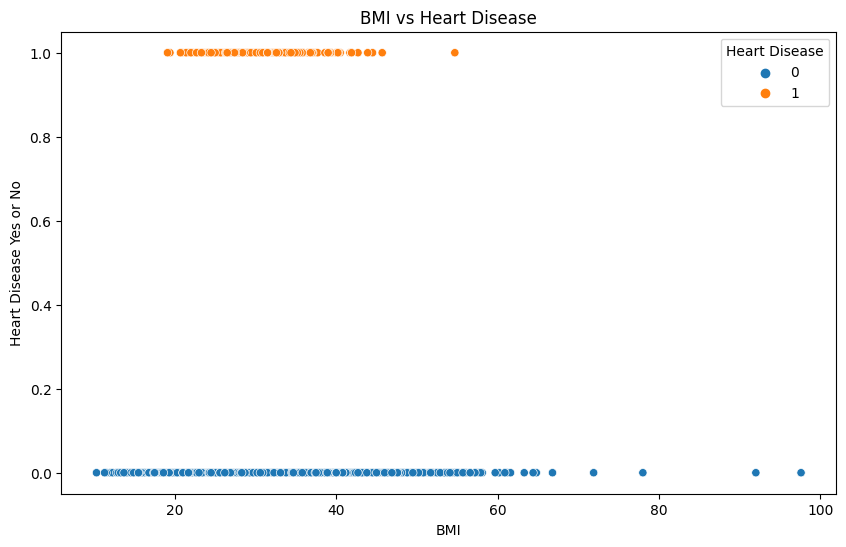

In [17]:
#Trying to figure out if there is any relation between BMI and Heart Disease
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi',y='heart_disease',hue='heart_disease',data=df)
plt.title("BMI vs Heart Disease")
plt.xlabel("BMI")
plt.ylabel("Heart Disease Yes or No")
plt.legend(title="Heart Disease")
plt.show()

In [18]:
df.head()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [19]:
#Seperating Numeric values to check for outliers
df_numeric=df[['age','avg_glucose_level','bmi']]

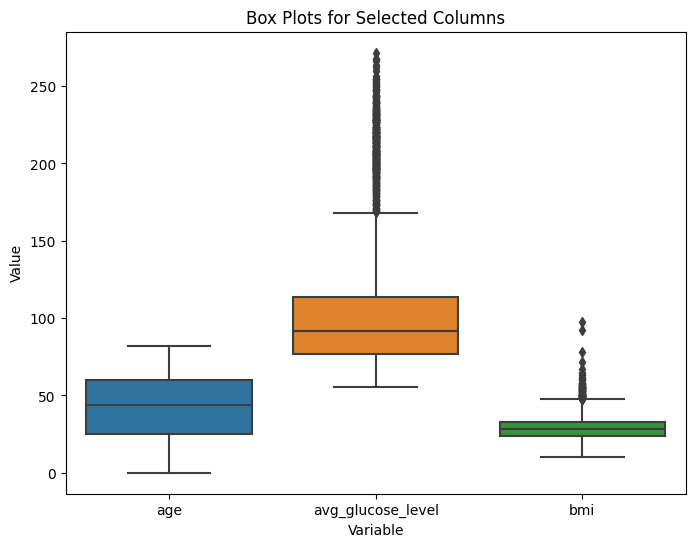

In [20]:
# Melting the DataFrame for seaborn box plot
df_melted = df_numeric.melt(var_name='Variable', value_name='Value')

# Create a seaborn box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted)
#plt.xticks(rotation=45)
plt.title('Box Plots for Selected Columns')
plt.show()


In [21]:
df['avg_glucose_level'].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [22]:
#One hot encoding data
df_en=pd.get_dummies(df,columns=['gender','work_type','Residence_type','smoking_status'])
df_en.head()

,index,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,9046,67.0,0,1,Yes,228.69,36.6,1,False,...,False,True,False,False,False,True,False,True,False,False
1,2,31112,80.0,0,1,Yes,105.92,32.5,1,False,...,False,True,False,False,True,False,False,False,True,False
2,3,60182,49.0,0,0,Yes,171.23,34.4,1,True,...,False,True,False,False,False,True,False,False,False,True
3,4,1665,79.0,1,0,Yes,174.12,24.0,1,True,...,False,False,True,False,True,False,False,False,True,False
4,5,56669,81.0,0,0,Yes,186.21,29.0,1,False,...,False,True,False,False,False,True,False,True,False,False


In [23]:
#Info about encoded data and new columns
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           4909 non-null   int64  
 1   id                              4909 non-null   int64  
 2   age                             4909 non-null   float64
 3   hypertension                    4909 non-null   int64  
 4   heart_disease                   4909 non-null   int64  
 5   ever_married                    4909 non-null   object 
 6   avg_glucose_level               4909 non-null   float64
 7   bmi                             4909 non-null   float64
 8   stroke                          4909 non-null   int64  
 9   gender_Female                   4909 non-null   bool   
 10  gender_Male                     4909 non-null   bool   
 11  gender_Other                    4909 non-null   bool   
 12  work_type_Govt_job              49

In [24]:
#Just looking at data
df_en[df_en['smoking_status_smokes']]['gender_Female'].value_counts()
df_en[df_en['smoking_status_never smoked']]['gender_Female'].value_counts()


gender_Female
True     1203
False     649
Name: count, dtype: int64

In [25]:
#Just looking at data
male_count=df_en["gender_Female"].value_counts()
male_count=male_count.get(0,0)
print(male_count)

2897


/tmp/ipykernel_19/4200206600.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_count=male_count.get(0,0)


/tmp/ipykernel_19/443395068.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_females = counts.get(1, 0)  # Returns the count of females, defaults to 0 if not found
/tmp/ipykernel_19/443395068.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_males = counts.get(0, 0)    # Returns the count of males, defaults to 0 if not found


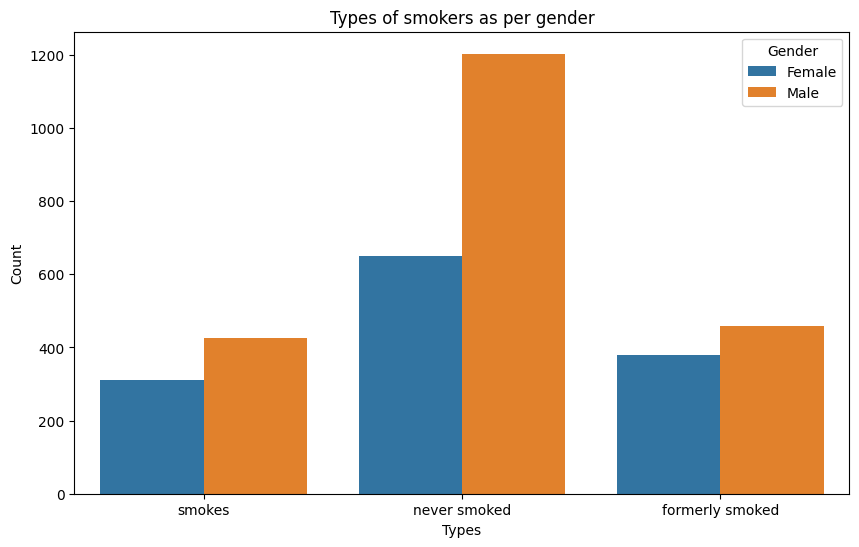

In [26]:
#Genderwise distribution of categories of smokers
smoking_statuses = ['smoking_status_smokes', 'smoking_status_never smoked', 'smoking_status_formerly smoked']
vis_data = []

# Loop through each smoking status column
for status in smoking_statuses:
    # Filter rows where the smoking status is 1
    counts = df_en[df_en[status] == 1]['gender_Female'].value_counts()

    # Get the count of females (1) and males (0) using .get()
    count_females = counts.get(1, 0)  # Returns the count of females, defaults to 0 if not found
    count_males = counts.get(0, 0)    # Returns the count of males, defaults to 0 if not found

    # Print the formatted output for each smoking status
    #print(f"{status.replace('smoking_status_', '')} - Female: {count_females}, Male: {count_males}")

    vis_data.append({"Smoking Status": status.replace("smoking_status_",""),
                    "Gender":"Female",
                    "Count":count_females})
    vis_data.append({"Smoking Status":status.replace("smoking_status_",""),
                    "Gender":"Male",
                    "Count":count_males})
    
vis_df=pd.DataFrame(vis_data)
vis_df.head()

plt.figure(figsize=(10,6))
sns.barplot(x='Smoking Status',y='Count',hue='Gender',data=vis_df)
plt.title("Types of smokers as per gender")
plt.xlabel("Types")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()
    
    

In [27]:
vis_df.groupby('Smoking Status').sum('Count')

,Count
Smoking Status,
formerly smoked,837
never smoked,1852
smokes,737


In [28]:
#Encoding Marriage status
marriage_map={"Yes":1,"No":0}
df_en['ever_married_en']=df_en['ever_married'].map(marriage_map)
df_en.head()

,index,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_en
0,0,9046,67.0,0,1,Yes,228.69,36.6,1,False,...,True,False,False,False,True,False,True,False,False,1
1,2,31112,80.0,0,1,Yes,105.92,32.5,1,False,...,True,False,False,True,False,False,False,True,False,1
2,3,60182,49.0,0,0,Yes,171.23,34.4,1,True,...,True,False,False,False,True,False,False,False,True,1
3,4,1665,79.0,1,0,Yes,174.12,24.0,1,True,...,False,True,False,True,False,False,False,True,False,1
4,5,56669,81.0,0,0,Yes,186.21,29.0,1,False,...,True,False,False,False,True,False,True,False,False,1


In [29]:
df_en.drop(columns=['ever_married'],inplace=True)

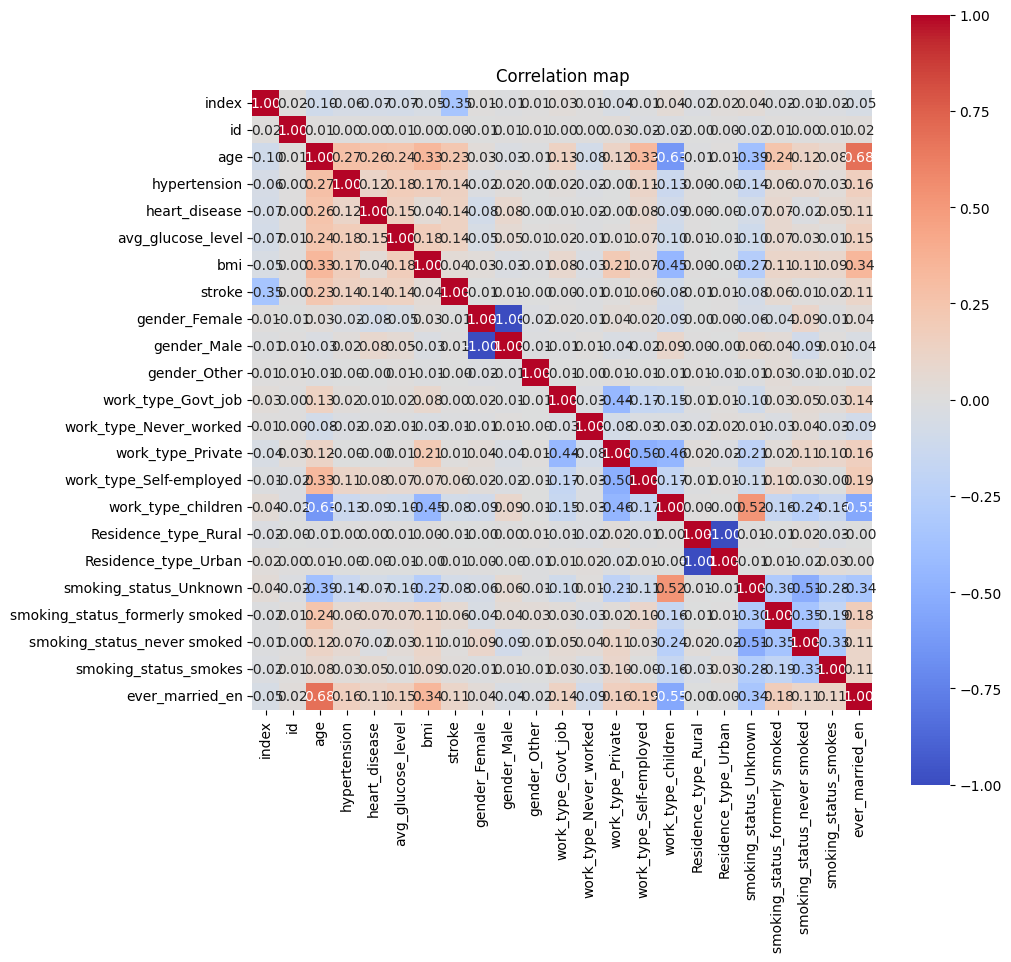

In [30]:
#Correlation matrix between features
corr_mat=df_en.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation map")
plt.show()

In [31]:
#Converting bool to int to feed it into model
bool_columns=df_en.select_dtypes(include=['bool']).columns
df_en[bool_columns]=df_en[bool_columns].astype(int)

In [32]:
#Seperating input and target columns
X=df_en.drop(columns=["stroke"])
Y=df_en["stroke"]
X.head()


,index,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_en
0,0,9046,67.0,0,1,228.69,36.6,0,1,0,...,1,0,0,0,1,0,1,0,0,1
1,2,31112,80.0,0,1,105.92,32.5,0,1,0,...,1,0,0,1,0,0,0,1,0,1
2,3,60182,49.0,0,0,171.23,34.4,1,0,0,...,1,0,0,0,1,0,0,0,1,1
3,4,1665,79.0,1,0,174.12,24.0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
4,5,56669,81.0,0,0,186.21,29.0,0,1,0,...,1,0,0,0,1,0,1,0,0,1


In [33]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           4909 non-null   int64  
 1   id                              4909 non-null   int64  
 2   age                             4909 non-null   float64
 3   hypertension                    4909 non-null   int64  
 4   heart_disease                   4909 non-null   int64  
 5   avg_glucose_level               4909 non-null   float64
 6   bmi                             4909 non-null   float64
 7   stroke                          4909 non-null   int64  
 8   gender_Female                   4909 non-null   int64  
 9   gender_Male                     4909 non-null   int64  
 10  gender_Other                    4909 non-null   int64  
 11  work_type_Govt_job              4909 non-null   int64  
 12  work_type_Never_worked          49

In [34]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [35]:
#Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

In [36]:
#SVM model with linear kernel
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [37]:
y_pred=model.predict(X_test)

In [38]:
#Metrics to check model performance
accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
class_rep=classification_report(y_test,y_pred)


In [39]:
print(f"Accuracy:{accuracy*100:.2f}%")
print(conf_mat)
print(class_rep)

Accuracy:99.85%
[[1870    1]
 [   2   91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1871
           1       0.99      0.98      0.98        93

    accuracy                           1.00      1964
   macro avg       0.99      0.99      0.99      1964
weighted avg       1.00      1.00      1.00      1964



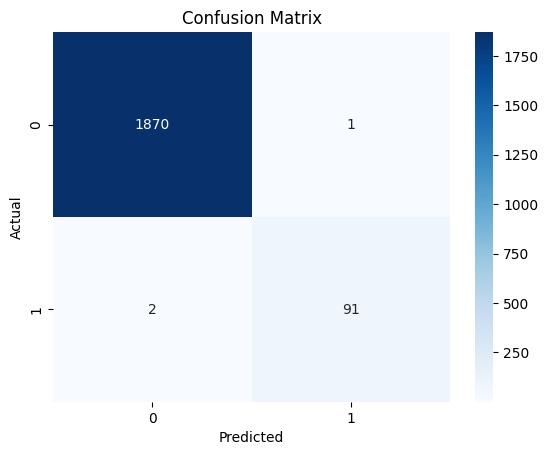

In [40]:
#Final Confusion matrix
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()